In [1]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pymc3 as pm


WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


In [5]:
# Define some useful functions

def stockprice(S0, t, mu, sigma, n):

    """
    This function will return the stock price at time t given the initial stock price S0, the drift mu, the volatility sigma, and the number 
    n is number of sampes
    """

    # Calculate the stock price at time t
    St = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * np.sqrt(t) * np.random.normal(0, 1, n))

    return St

def stockprice_evolution(S0, t, dt, mu, sigma, n):

    "Simulate stock price according to geometric brownian motion"

    St = np.zeros((n, len(t)))
    St[:, 0] = S0

    for i in range(1, len(t)):
        St[:, i] = St[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.normal(0, 1, n))

    return St
    



In [37]:
# Define the parameters
mu = 0.1
sigma = 0.1
S0 = 100
n = 1

# Define the time period
dt = 0.001
t = np.arange(0, 10, dt)


# Calculate the stock price at time t
St = stockprice_evolution(S0, t, dt, mu, sigma, n)

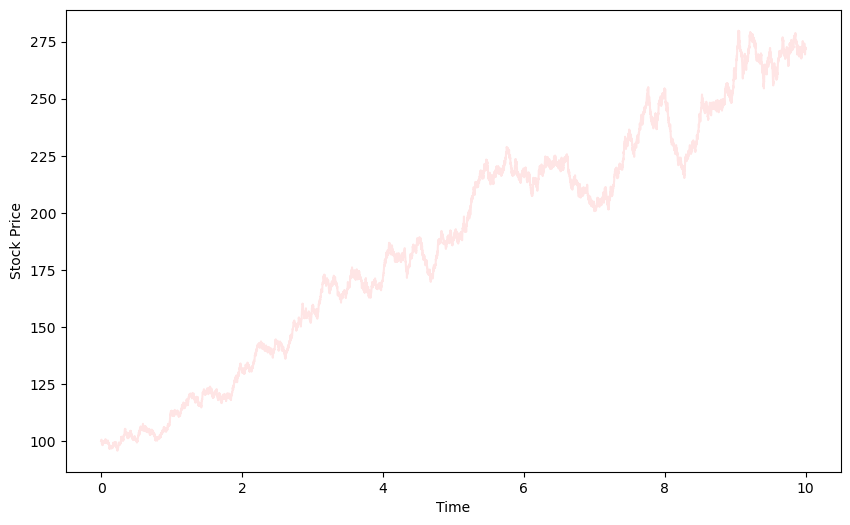

In [38]:
fig = plt.figure(figsize=(10, 6))
plt.plot(t, St[:1000, :].T, color='r', alpha=0.1)
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

In [2]:
obs_y = np.random.normal(0.5, 0.3, 2000)

with pm.Model() as exercise1:

    std = pm.HalfNormal('std', sd=1)
    mu = pm.Normal('mu', mu=0, sd=1)

    y = pm.Normal('y', mu=mu, sd=std, observed=obs_y)

    trace = pm.sample(1000)

    pm.traceplot(trace)
    plt.show()

KeyboardInterrupt: 